### Load Important Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading UBER and Other providers datasets only for July

In [143]:
df_uber= pd.read_csv('Uber_July.csv')
df_other= pd.read_csv('other_cab_july14.csv')

In [144]:
df_uber.head(2)

,Date,Time,Provider
0,2014-07-01,00:03:00,Uber
1,2014-07-01,00:05:00,Uber


In [147]:
df_other.head(2)

,Unnamed: 0,Date,Time,Provider
0,0,2014-07-01,0:00:00,Carmel
1,1,2014-07-01,0:00:00,Carmel


### Concate the datasets
 > Here we concate **UBER and Other FHV** picks from **only July,2014** for comparitive analysis.

In [150]:
df= pd.concat([df_uber,df_other], ignore_index=True)

#### Drop unwanted columns

In [153]:
df= df.drop('Unnamed: 0', axis=1)
df.head(2)

,Date,Time,Provider
0,2014-07-01,00:03:00,Uber
1,2014-07-01,00:05:00,Uber


### Data Understanding and Correction

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006892 entries, 0 to 1006891
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Date      1006892 non-null  object
 1   Time      1006892 non-null  object
 2   Provider  1006892 non-null  object
dtypes: object(3)
memory usage: 23.0+ MB


 >**Observation**: Date/Time is not in correct datatype

In [159]:
df['Date']=pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
df['Time_only'] = df['Time'].dt.time

df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Month Name'] = df['Date'].dt.month_name()

#Extracct Hours, Minutes, Seconds
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second

In [160]:
df.info()
print('Datatype Corrected')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006892 entries, 0 to 1006891
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Date        1006892 non-null  datetime64[ns]
 1   Time        1006892 non-null  datetime64[ns]
 2   Provider    1006892 non-null  object        
 3   Time_only   1006892 non-null  object        
 4   Day         1006892 non-null  int32         
 5   Weekday     1006892 non-null  object        
 6   Month       1006892 non-null  int32         
 7   Month Name  1006892 non-null  object        
 8   Hour        1006892 non-null  int32         
 9   Minute      1006892 non-null  int32         
 10  Second      1006892 non-null  int32         
dtypes: datetime64[ns](2), int32(5), object(4)
memory usage: 65.3+ MB
Datatype Corrected


#### Checking Unique Columns

In [164]:
df['Provider'].unique()

array(['Uber', 'Carmel', 'Dial7', 'FirstClass'], dtype=object)

In [166]:
df.head(2)

,Date,Time,Provider,Time_only,Day,Weekday,Month,Month Name,Hour,Minute,Second
0,2014-07-01,1900-01-01 00:03:00,Uber,00:03:00,1,Tuesday,7,July,0,3,0
1,2014-07-01,1900-01-01 00:05:00,Uber,00:05:00,1,Tuesday,7,July,0,5,0


In [168]:
df= df.drop('Time', axis=1) # delete time column for incorrect date

### **Comparitive Analysis**

#### 1. Pie Chart: Provider-wise Contribution to Total Trips – July 2014

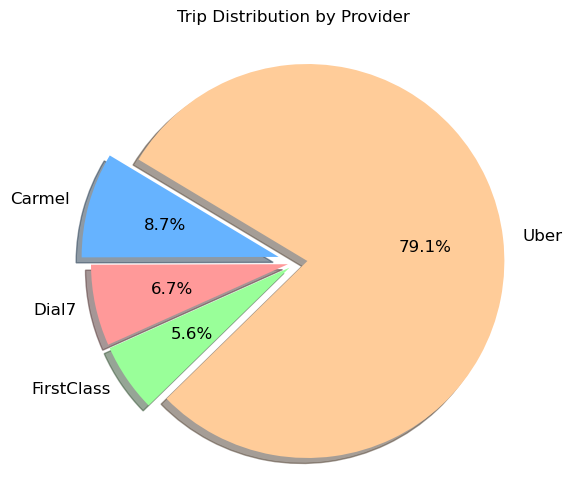

In [181]:
provider_trips = df.groupby('Provider')['Day'].count()

explode = (0.1, 0.05, 0.05, 0.05, )
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(provider_trips, 
        labels=provider_trips.index, 
        autopct='%1.1f%%', startangle=149, 
        explode=explode,shadow=True, 
        textprops={'fontsize': 12},
       colors=colors)

plt.title('Trip Distribution by Provider')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

**Observation**:

---
  > **Uber** dominated the market with **79.1%** of **total trips in July 2014**, significantly outperforming traditional **FHV providers: Carmel, Dial7, and Firstclass** followed with much smaller shares, indicating Uber’s strong foothold and growing preference among taxi providers.

#### 2. Barchart: Weekly Trip Distribution by Provider – July 2014

In [185]:
monthly_trip= df.groupby(['Provider','Weekday'])['Weekday'].count()
df_monthly_trip = pd.DataFrame({'Weekly Trip': monthly_trip.values},index=monthly_trip.index)
df_monthly_trip.head()

Weekly Trip
Provider Weekday              
Carmel   Friday          11152
         Monday          12278
         Saturday         8374
         Sunday           9572
         Thursday        16532

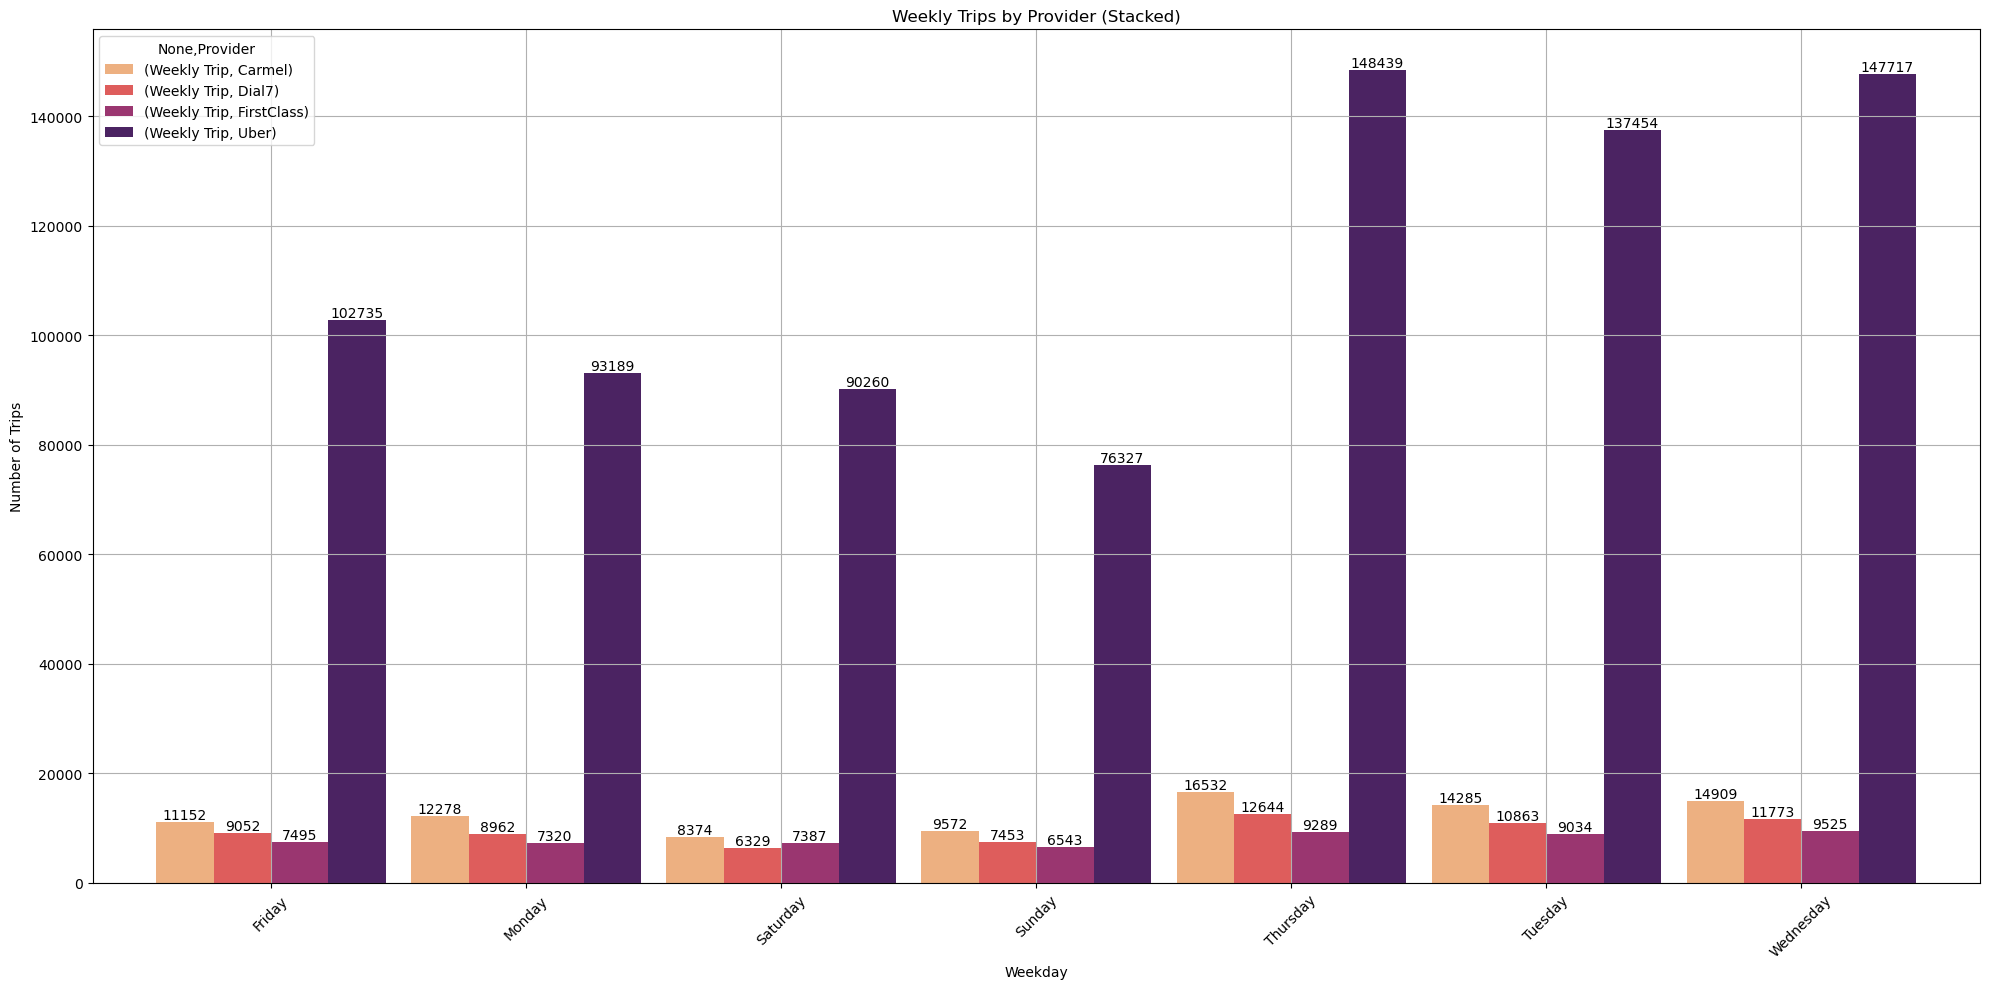

In [240]:
df_plot = df_monthly_trip.unstack(level=0)

ax= df_plot.plot(kind='bar', figsize=(20,10), stacked = False, colormap='flare', width=.9)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

    
plt.ylabel('Number of Trips')
plt.title('Weekly Trips by Provider (Stacked)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

**Observation**:

---
 >**UBER consistently dominated trip volume across all weekdays**, maintaining a significant lead over other providers. **Carmel followed in second place**, though with a substantial gap, while Dial7 and Firstclass remained the lowest contributors throughout weeks of July 2014.

#### 3. Provider-wise Weekday vs Weekend Trip Comparison – July 2014

In [194]:
per_provider_trip= df.groupby(['Provider','Weekday'])['Day'].count()
df_weekly_trip_analysis = pd.DataFrame({'Weekly Trip': per_provider_trip.values},index=per_provider_trip.index)
df_weekly_trip_analysis.head()

Weekly Trip
Provider Weekday              
Carmel   Friday          11152
         Monday          12278
         Saturday         8374
         Sunday           9572
         Thursday        16532

In [198]:
# making a pivot table
pivot_table= df.pivot_table(columns= 'Weekday', index= 'Provider', values='Day', aggfunc='count')

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

# Add Weekday and Weekend totals per provider (row-wise)
pivot_table['Weekday Total'] = pivot_table[weekdays].sum(axis=1)
pivot_table['Weekend Total'] = pivot_table[weekends].sum(axis=1)
pivot_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Weekday Total,Weekend Total
Provider,,,,,,,,,
Carmel,11152,12278,8374,9572,16532,14285,14909,69156,17946
Dial7,9052,8962,6329,7453,12644,10863,11773,53294,13782
FirstClass,7495,7320,7387,6543,9289,9034,9525,42663,13930
Uber,102735,93189,90260,76327,148439,137454,147717,629534,166587


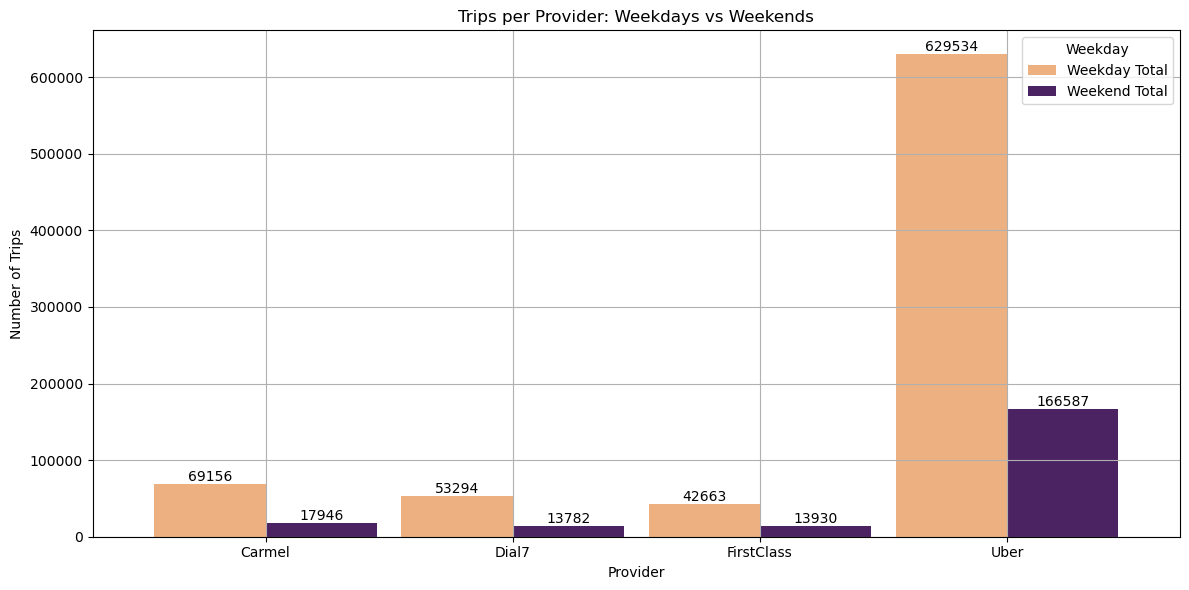

In [204]:
ax= pivot_table[['Weekday Total', 'Weekend Total']].plot(kind='bar', figsize=(12, 6), colormap='flare',width=.9)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
plt.title('Trips per Provider: Weekdays vs Weekends')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(True)
plt.show()

**Observation**:

---
 >1. In July 2014, **Uber handled 79.2% of weekday trips and 78.5% of weekend trips** out of all prividers trips, outpacing traditional providers. This consistent dominance across both segments highlights Uber’s widespread adoption for both workday commuting and leisure travel.
 >2. This consistent dominance across both commuter and leisure segments highlights Uber’s operational scalability, customer preference, and strong market penetration compared to traditional providers like Carmel, Dial7, and Firstclass.

#### Barchart: Hourly Trip Distribution by Provider – July 2014

In [221]:
per_provider_trip_hour= df.groupby(['Provider','Hour'])['Hour'].count()
df_hourly_trip_analysis = pd.DataFrame({'Hourly Trip': per_provider_trip_hour.values},index=per_provider_trip_hour.index)
df_hourly_trip_analysis.head()

Hourly Trip
Provider Hour             
Carmel   0            1317
         1             661
         2             382
         3             600
         4            2926

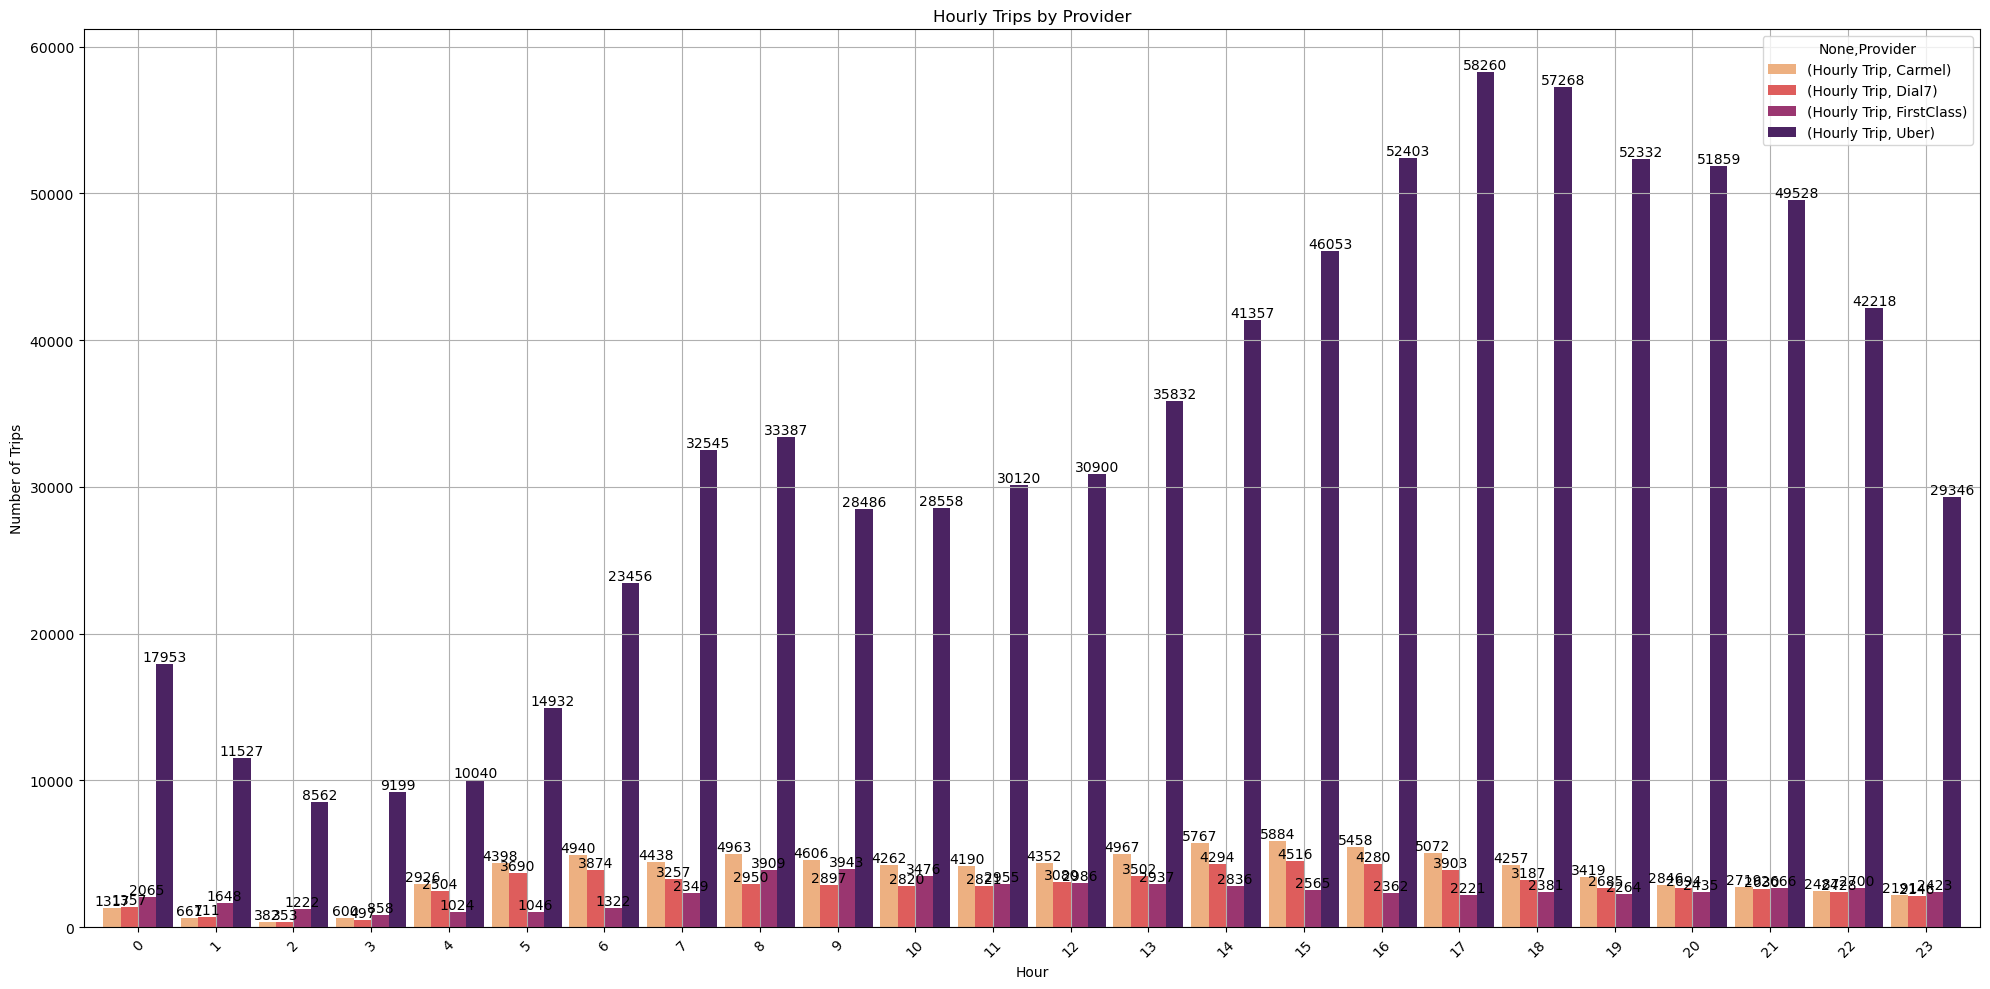

In [223]:
#unstacked forst
df_plot1 = df_hourly_trip_analysis.unstack(level=0)

ax= df_plot1.plot(kind='bar', figsize=(20,10), stacked = False, colormap='flare', width=.9)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

    
plt.ylabel('Number of Trips')
plt.title('Hourly Trips by Provider')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

**Observation**:

---
 >1. Uber consistently dominated across all hours, with peak activity between **5 PM and 8 PM**, exceeding 50,000+ trips per hour during that period — indicating strong evening commute and leisure demand.

 >2. In contrast, Carmel, Dial7, and Firstclass showed moderate peaks mostly during morning (7–10 AM) and early evening hours, suggesting their usage is more aligned with traditional commuting behavior.

 >3. Notably, Uber also maintained non-negligible **late-night and early-morning demand (12 AM to 6 AM)**. The traditional providers, whose activity was minimal during these hours. This highlights Uber’s 24/7 availability and its strong appeal for both early-morning office commutes and late-night leisure travel.

### **Conclusion**:

---
From the above analysis of July 2014 data comparing Uber and traditional FHV providers, it is evident that Uber showing strong demand even during **late-night and peak hours**. This reflects **the platform’s reliability, app-based accessibility, and operational flexibility areas**, where traditional providers lag behind.

---
### **Suggestion**:
To remain competitive, **traditional FHVs must adapt by offering 24/7 service models and embracing digital booking platforms**.